# 전처리

In [3]:
import pandas as pd
import re
from datetime import datetime

# path = r'E:\Git Clone\개인 프로젝트\KBS_TEFN\반도체시장_전처리\1_pre_반도체시장_아시아경제.json"

data = pd.read_csv("hanwha.csv", index_col=None)
# data = pd.read_json(path, index_col=None)
data

,content,date,media,title,url
0,NaN,NaN,NaN,NaN,https://sports.news.naver.com/news.nhn?oid=001...
1,[이데일리 정수영 기자] 을미년 새해 초부 건설업계에 칼바람이 불고 있다. 시공능력...,2015.01.01. 오후 5:13,이데일리,연초부터 건설업계 '칼바람'..새해도 악재 '산 넘어 산',https://news.naver.com/main/read.nhn?mode=LSD&...
2,■ 정부 긴급구호대 1명 에볼라 노출 가능성…독일 후송 시에라리온에 파견된 우...,2015.01.02. 오후 8:00,연합뉴스,<연합뉴스 이 시각 헤드라인> - 20:00,https://news.naver.com/main/read.nhn?mode=LSD&...
3,NaN,NaN,NaN,NaN,https://sports.news.naver.com/news.nhn?oid=001...
4,대졸신입 대리 승진보다 6개월 빨라…3명중 1명 임원으로 입사 (서울=연합뉴스...,2015.01.08. 오전 6:11,연합뉴스,"대기업 총수자녀, 28세 입사해 3.5년 만에 임원 승진",https://news.naver.com/main/read.nhn?mode=LSD&...
...,...,...,...,...,...
73287,[이데일리 배진솔 기자] 전국경제인연합회(전경련)은 23일 전경련 회관에서 지난 8...,2020.09.23. 오전 8:40,이데일리,"전경련, 주한베트남 대사만나 '한-베트남 경제협력 증진방안 논의'",https://news.naver.com/main/read.nhn?mode=LSD&...
73288,NaN,NaN,NaN,NaN,https://sports.news.naver.com/news.nhn?oid=001...
73289,[이데일리 전선형 이승현 기자] 회사원 김명은씨는 분통이 터졌다. 최근 은행창구를 ...,2020.09.23. 오전 6:02,이데일리,'보험료 카드납부 왜 안되나'‥10년 묵은 쟁점 다시 도마위,https://news.naver.com/main/read.nhn?mode=LSD&...
73290,(서울=연합뉴스) 서미숙 기자 = 국내 주요 재벌그룹의 오너 일가가 대출을 위해 금...,2020.09.23. 오전 5:31,연합뉴스,오너일가 보유주식의 18%는 은행 소유…담보설정 14조8천억원,https://news.naver.com/main/read.nhn?mode=LSD&...


In [4]:
df = data.dropna()

# df = df.drop_duplicates(['date'])
df["date"] = df.date.str.replace("\. .*", "").str.replace("\.","-")
df["date"] = df.date.astype('datetime64[ns]')
# df = df.set_index("date")
# df = df.sort_index()
df = df.sort_values(by=['date'], axis=0)
df = df.reset_index().drop(["index"], axis=1)
# df

# df = df[df.date >= '2020-01-01']
df

C:\Users\myhome\.conda\envs\nlp\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\myhome\.conda\envs\nlp\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,content,date,media,title,url
0,[이데일리 정수영 기자] 을미년 새해 초부 건설업계에 칼바람이 불고 있다. 시공능력...,2015-01-01,이데일리,연초부터 건설업계 '칼바람'..새해도 악재 '산 넘어 산',https://news.naver.com/main/read.nhn?mode=LSD&...
1,[이데일리 성문재 기자] 중화학 업계는 그야말로 다사다난했던 2014년을 보냈다. ...,2015-01-01,이데일리,"[새해전망]④중화학, 2015년에도 '도찐개찐'",https://news.naver.com/main/read.nhn?mode=LSD&...
2,상반기 기준금리 인하시 추가하락 불가피 (서울=연합뉴스) 이지헌 홍국기 기자 ...,2015-01-01,연합뉴스,은행권 연말연초에 예금금리 또 인하,https://news.naver.com/main/read.nhn?mode=LSD&...
3,[이데일리 정태선 기자] 새롭게 조직을 정비한 전자업계는 올해 ‘안정 속 성장’으로...,2015-01-01,이데일리,[비즈니스 X파일]그룹내 특공대는 어디,https://news.naver.com/main/read.nhn?mode=LSD&...
4,◇지역단장 ▲동부광진 나주호 ▲충북 송정섭 ▲충남 임장혁 ▲무등 박희창 ▲포항...,2015-01-01,연합뉴스,<인사> 한화생명,https://news.naver.com/main/read.nhn?mode=LSD&...
...,...,...,...,...,...
34942,[이데일리 경계영 기자] ◇대표이사 내정△㈜한화(000880) 글로벌부문 김맹윤 △...,2020-09-28,이데일리,[인사]한화그룹 대표이사,https://news.naver.com/main/read.nhn?mode=LSD&...
34943,[이데일리 이광수 기자] 흥국증권은 한화솔루션(009830)에 대해 미국 수소차 업...,2020-09-28,이데일리,"""한화솔루션, 가장 싼 뉴딜주…니콜라 이슈 과하게 반영""",https://news.naver.com/main/read.nhn?mode=LSD&...
34944,[이데일리 김정유 기자] 한화그룹은 한화솔루션 전략부문에 김동관 부사장(사진)을 사...,2020-09-28,이데일리,[프로필]김동관 한화솔루션 전략부문 대표이사,https://news.naver.com/main/read.nhn?mode=LSD&...
34945,(서울=연합뉴스) 28일 한화그룹 사장단 인사에서 김승연 한화그룹 회장의 장남인 김...,2020-09-28,연합뉴스,"한화, 김동관 한화솔루션 대표이사 사장 승진",https://news.naver.com/main/read.nhn?mode=LSD&...


In [5]:
df["content"] = df["content"].str.replace("\[.+기자\]", "").str.strip()
df["content"] = df["content"].str.replace("[가-힝]{3} \([a-zA-Z0-9]+@[a-zA-Z0-9]+\.co\.kr\)", "").str.strip()
df["content"] = df["content"].str.replace("\([a-zA-Z0-9]+@[a-zA-Z0-9]+\.co\.kr\)", "").str.strip()
df["content"] = df["content"].str.replace("\(.+=연합뉴스\).+기자 =", "").str.strip()
df["content"] = df["content"].str.replace("\(연합뉴스\)", "").str.strip()
df["content"] = df["content"].str.replace("\([가-힣]+=연합뉴스\)", "").str.strip()
df["content"] = df["content"].str.replace("\([가-힣]+ 연합뉴스\)", "").str.strip()
df["content"] = df["content"].str.replace("[a-zA-Z0-9]+@[a-zA-Z0-9]+\.co\.kr", "").str.strip()
df["content"] = df["content"].str.replace("\<저작권자.+금지\>", "").str.strip()
df["content"] = df["content"].str.replace("▲", "").str.strip()
df["content"] = df["content"].str.replace("◇", "").str.strip()
df["content"] = df["content"].str.replace("◆", "").str.strip()
df["content"] = df["content"].str.replace("▷", "").str.strip()
df["content"] = df["content"].str.replace("△", "").str.strip()
df["content"] = df["content"].str.replace("\[이데일리.+\]", "").str.strip()
df["content"] = df["content"].str.replace("\[.+특파원\]", "").str.strip()
df["content"] = df["content"].str.replace("■", "").str.strip()
df["content"] = df["content"].str.replace("○", " ").str.strip()
df["content"] = df["content"].str.replace("ⓝ", " ").str.strip()
df["content"] = df["content"].str.replace("<<.+>>", "").str.strip()
df["content"] = df["content"].str.replace("[0-9]{4}\.[0-9]+\.[0-9]+", "").str.strip()
df["content"] = df["content"].str.replace("문의는.*홈페이지.*\.", "").str.strip()
df["content"] = df["content"].str.replace("☎", "").str.strip()
df["content"] = df["content"].str.replace("[0-9]+-[0-9]+-[0-9]+", "").str.strip()
df["content"] = df["content"].str.replace("www\.[a-zA-Z0-9]+\.co\.kr", "").str.strip()
df["content"] = df["content"].str.replace("\(대표이사.+\)", "").str.strip()
df["content"] = df["content"].str.replace("\\'", "").str.strip()
df["content"] = df["content"].str.replace("\'", "").str.strip()
df["content"] = df["content"].str.replace("\"", "").str.strip()
df["content"] = df["content"].str.replace("‘", "").str.strip()
df["content"] = df["content"].str.replace("’", "").str.strip()
df["content"] = df["content"].str.replace("“", "").str.strip()
df["content"] = df["content"].str.replace("”", "").str.strip()
df["content"] = df["content"].str.replace("=", " ").str.strip()
df["content"] = df["content"].str.replace("--", " ").str.strip()
df["content"] = df["content"].str.replace("http:\/\/www\.[a-zA-Z0-9]+\.com\/", "").str.strip()
df["content"] = df["content"].str.replace("https:\/\/www\.[a-zA-Z0-9]+\.com\/", "").str.strip()
df["content"] = df["content"].str.replace("http:\/\/www\.[a-zA-Z0-9]+\.com", "").str.strip()
df["content"] = df["content"].str.replace("https:\/\/www\.[a-zA-Z0-9]+\.com", "").str.strip()
df["content"] = df["content"].str.replace("www\.[a-zA-Z0-9]+\.com\/[a-zA-Z0-9]+", "").str.strip()
df["content"] = df["content"].str.replace("www\.[a-zA-Z0-9]+\.com", "").str.strip()
df["content"] = df["content"].str.replace("추가 정보:", " ").str.strip()
df["content"] = df["content"].str.replace("자료 제공:", " ").str.strip()
df["content"] = df["content"].str.replace("\[.+금지\]", "").str.strip()
df["content"] = df["content"].str.replace("\(\)", "").str.strip()
df["content"] = df["content"].str.replace("[ ]+", " ").str.strip()

In [6]:
documents = df.content.values.tolist()
# documents

In [7]:
from konlpy.tag import Mecab
mecab = Mecab()

tokenized_docs = df['content'].apply(lambda x: mecab.nouns(x))
tokenized_docs = tokenized_docs.apply(lambda x: [item for item in x if len(item)>1])
tokenized_docs

0        [미년, 새해, 초부, 건설업, 칼바람, 시공, 능력, 평가, 순위, 동부건설, 결...
1        [중화학, 업계, 다사다난, 사고, 안전, 관리, 문제, 도마, 글로벌, 경기, 침...
2        [상반기, 기준, 금리, 추가, 하락, 초저, 금리, 기조, 은행, 만기, 정기예금...
3        [조직, 정비, 전자, 업계, 올해, 안정, 성장, 다지기, 주력, 삼성전자, 스마...
4        [지역, 단장, 동부, 광진, 나주호, 충북, 송정섭, 충남, 임장혁, 무등, 박희...
                               ...                        
34942    [대표, 이사, 내정, 한화, 글로벌, 부문, 김맹윤, 방산, 부문, 김승모, 한화...
34943    [흥국, 증권, 한화, 솔루션, 미국, 수소, 업체, 니콜라, 이슈, 주가, 반영,...
34944    [한화그룹, 한화, 솔루션, 전략, 부문, 김동관, 부사장, 사진, 사장, 승진, ...
34945    [한화그룹, 장단, 인사, 김승연, 한화그룹, 회장, 장남, 김동관, 한화, 솔루션...
34946    [한화그룹, 계열사, 장단, 인사, 단행, 왼쪽, 한화, 글로벌, 부문, 김맹윤, ...
Name: content, Length: 34947, dtype: object

# MalletLDA

In [8]:
import warnings
warnings.filterwarnings("ignore")

import os
from gensim import corpora
from gensim.models.wrappers import LdaMallet

id2word=corpora.Dictionary(tokenized_docs)
texts = tokenized_docs
corpus=[id2word.doc2bow(text) for text in texts]

os.environ['Mallet_HOME'] = 'C:\\Mallet'
mallet_path = 'C:\\Mallet\\bin\\mallet' 
ldamallet = LdaMallet(mallet_path, corpus=corpus, num_topics=100, id2word=id2word)

In [9]:
ldamallet.print_topics(20)

[(46,
  '0.067*"삼성전자" + 0.058*"반도체" + 0.046*"분기" + 0.038*"실적" + 0.031*"천억" + 0.028*"전자" + 0.027*"전망" + 0.027*"디스플레이" + 0.026*"올해" + 0.024*"최대"'),
 (62,
  '0.054*"경제" + 0.036*"참석" + 0.035*"대통령" + 0.031*"간담회" + 0.026*"기업" + 0.026*"회장" + 0.022*"부회장" + 0.018*"이날" + 0.016*"장관" + 0.016*"전경련"'),
 (53,
  '0.047*"상황" + 0.042*"때문" + 0.034*"관계자" + 0.032*"업계" + 0.032*"경우" + 0.028*"가능" + 0.025*"문제" + 0.019*"만큼" + 0.018*"우려" + 0.015*"최근"'),
 (59,
  '0.042*"중단" + 0.032*"비용" + 0.029*"결정" + 0.026*"기간" + 0.018*"업체" + 0.016*"관련" + 0.016*"연장" + 0.014*"진행" + 0.013*"개월" + 0.013*"관계자"'),
 (55,
  '0.056*"의원" + 0.028*"국회" + 0.027*"대표" + 0.026*"후보" + 0.021*"국민" + 0.021*"전문" + 0.019*"민주당" + 0.015*"정치" + 0.013*"위원회" + 0.012*"위원장"'),
 (51,
  '0.209*"대표" + 0.086*"이사" + 0.082*"사장" + 0.032*"부사장" + 0.030*"임원" + 0.025*"전무" + 0.024*"상무" + 0.022*"본부" + 0.020*"인사" + 0.018*"경영"'),
 (35,
  '0.030*"모델" + 0.018*"엔진" + 0.018*"판매" + 0.017*"최고" + 0.014*"가격" + 0.014*"차량" + 0.014*"마력" + 0.012*"적용" + 0.012*"공개" + 0.012*"최대"'),
 (8,

# Mallet LDA 데이터프레임

## 데이터프레임 만들기

In [10]:
import pandas as pd

trading_volume_df = pd.read_csv("trading_volume.csv", index_col = "날짜", parse_dates=True)
trading_volume_df = trading_volume_df.sort_index() # 정렬 sort_values()
# trading_volume_df = trading_volume_df['2020-01-01':'2020-09-28']
trading_volume_df

,거래량
날짜,
2015-01-02,158193
2015-01-05,214547
2015-01-06,182253
2015-01-07,118159
2015-01-08,156524
...,...
2020-09-23,592482
2020-09-24,467569
2020-09-25,330340


In [11]:
def format_topics_sentences(malletldamodel=ldamallet, corpus=corpus, texts=documents):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(malletldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = malletldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    sent_topics_df = pd.concat([sent_topics_df, df['date']], axis=1)
    
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords', 'Text', 'Date']
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(malletldamodel=ldamallet, corpus=corpus, texts=documents)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index(drop=True)
df_dominant_topic.columns = ['Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text', 'Date']

In [12]:
df_dominant_topic

,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,Date
0,67.0,0.2213,"건설, 공사, 수주, 한화건설, 사업, 규모, 프로젝트, 건설사, 이라크, 발주",을미년 새해 초부 건설업계에 칼바람이 불고 있다. 시공능력평가 순위 25위인 동부건...,2015-01-01
1,89.0,0.1052,"가격, 영향, 하락, 수요, 대비, 상승, 감소, 전망, 기록, 부진",중화학 업계는 그야말로 다사다난했던 2014년을 보냈다. 올초부터 잇단 사고 등으로...,2015-01-01
2,29.0,0.3267,"금리, 시장, 미국, 경기, 경제, 인상, 정책, 글로벌, 기준, 환율",상반기 기준금리 인하시 추가하락 불가피 초저금리 기조로 은행권 1년 만기 정기예금 ...,2015-01-01
3,37.0,0.1868,"사업, 부문, 회사, 강화, 추진, 인수, 확대, 계획, 시너지, 분야",새롭게 조직을 정비한 전자업계는 올해 안정 속 성장으로 내실 다지기에 주력할 것으로...,2015-01-01
4,77.0,0.1085,"팀장, 본부, 부장, 과장, 실장, 센터, 단장, 지원, 지역, 기획",지역단장 동부광진 나주호 충북 송정섭 충남 임장혁 무등 박희창 포항 박완철,2015-01-01
...,...,...,...,...,...
34942,51.0,0.2052,"대표, 이사, 사장, 부사장, 임원, 전무, 상무, 본부, 인사, 경영",대표이사 내정㈜한화(000880) 글로벌부문 김맹윤 방산부문 김승모 한화정밀기계 옥...,2020-09-28
34943,76.0,0.1220,"실적, 분기, 연구원, 이익, 개선, 주가, 전망, 예상, 성장, 투자",흥국증권은 한화솔루션(009830)에 대해 미국 수소차 업체 니콜라 이슈가 주가에 ...,2020-09-28
34944,51.0,0.2107,"대표, 이사, 사장, 부사장, 임원, 전무, 상무, 본부, 인사, 경영",한화그룹은 한화솔루션 전략부문에 김동관 부사장(사진)을 사장으로 승진시키며 신임 대...,2020-09-28
34945,51.0,0.1235,"대표, 이사, 사장, 부사장, 임원, 전무, 상무, 본부, 인사, 경영",28일 한화그룹 사장단 인사에서 김승연 한화그룹 회장의 장남인 김동관 한화솔루션 전...,2020-09-28


In [13]:
def func(x):
    d = {}
    topic_count = x['Dominant_Topic'].value_counts(ascending=False).to_dict()
#     topic_count = x.count(0.0, axis=0)
#     topic_count = x['Dominant_Topic'].value_counts(ascending=False).reset_index().values.tolist()
    d['Num_Documents'] = topic_count
    return pd.Series(d, index=['Num_Documents'])

date_topics_grpd = df_topic_sents_keywords.groupby(df_topic_sents_keywords['Date']).apply(func)
date_topics_grpd

,Num_Documents
Date,
2015-01-01,"{24.0: 1, 77.0: 1, 37.0: 1, 29.0: 1, 89.0: 1, ..."
2015-01-02,"{79.0: 2, 67.0: 1, 47.0: 1, 18.0: 1, 77.0: 1, ..."
2015-01-03,"{71.0: 2, 77.0: 1, 31.0: 1}"
2015-01-04,"{44.0: 2, 42.0: 1, 18.0: 1, 50.0: 1, 77.0: 1}"
2015-01-05,"{92.0: 3, 47.0: 2, 93.0: 2, 63.0: 2, 0.0: 1, 2..."
...,...
2020-09-24,"{93.0: 4, 85.0: 2, 32.0: 1, 14.0: 1, 24.0: 1, ..."
2020-09-25,"{34.0: 2, 25.0: 1, 6.0: 1, 15.0: 1, 70.0: 1, 2..."
2020-09-26,{26.0: 1}


In [15]:
def topic_count(malletldamodel=ldamallet, topic=0):
    topic_words_list = malletldamodel.show_topic(topic, )
    topic_keywords = [word for word, prop in topic_words_list]
    
    topic = round(float(topic), 1)
    topic_count = []
    for topic_count_dic in date_topics_grpd.Num_Documents:
        if topic in topic_count_dic:
            topic_count.append(int(topic_count_dic[topic]))
        else:
            topic_count.append(0)
            
    date_topics_grpd['Topic_count'] = topic_count
    
    count = 0
    for topic_count in date_topics_grpd.Topic_count:
        if topic_count != 0:
            count += 1
            
    describing_stock_market = ['주식', '시장', '금융', '주가']
    
    for describing_word in describing_stock_market:
        if describing_word in topic_keywords or count < 80:
            print('Not useful Topic', end=' ')
            return date_topics_grpd
    print('Useful Topic', end = ' ')
    
    
    merge_df = pd.merge(trading_volume_df, date_topics_grpd, left_index=True, right_index=True, how='inner')
    corr = merge_df.corr()
    print('{}%'.format(round(corr['Topic_count'][0]*100, 2)), end='')
    return date_topics_grpd

In [16]:
for i in range(100):
    print(i, end=' ')
    Date_count_grpd = topic_count(topic=i)
    print()

0 Useful Topic 1.25%
1 Useful Topic 0.81%
2 Not useful Topic 
3 Useful Topic 2.83%
4 Useful Topic -1.61%
5 Useful Topic -0.54%
6 Useful Topic 1.09%
7 Not useful Topic 
8 Useful Topic 0.75%
9 Useful Topic 0.05%
10 Useful Topic -1.68%
11 Useful Topic -1.67%
12 Useful Topic -3.33%
13 Useful Topic -1.97%
14 Useful Topic -1.76%
15 Useful Topic 7.81%
16 Useful Topic -5.27%
17 Useful Topic 7.28%
18 Not useful Topic 
19 Useful Topic -0.31%
20 Useful Topic -2.98%
21 Useful Topic -1.84%
22 Useful Topic -2.52%
23 Useful Topic -0.86%
24 Useful Topic -1.71%
25 Useful Topic 16.77%
26 Useful Topic 1.88%
27 Not useful Topic 
28 Useful Topic -2.3%
29 Not useful Topic 
30 Useful Topic 1.36%
31 Useful Topic -0.31%
32 Useful Topic -0.65%
33 Useful Topic 5.93%
34 Useful Topic -1.3%
35 Useful Topic 0.23%
36 Useful Topic 0.53%
37 Useful Topic 0.77%
38 Not useful Topic 
39 Useful Topic -0.25%
40 Not useful Topic 
41 Useful Topic -2.89%
42 Useful Topic -3.45%
43 Not useful Topic 
44 Not useful Topic 
45 Useful

In [17]:
ldamallet.show_topic(25)

[('행사', 0.06511292152212024),
 ('참가', 0.0432917397133134),
 ('개최', 0.04147674538517067),
 ('이번', 0.03691863462926678),
 ('참석', 0.028070537279571),
 ('세계', 0.025327420851809838),
 ('포럼', 0.02446117355883263),
 ('전시회', 0.02365680107249665),
 ('진행', 0.021284933484582862),
 ('참여', 0.019634938640816748)]

In [24]:
def topic_count(topic=0):
    topic = round(float(topic), 1)
    topic_count = []
    for topic_count_dic in date_topics_grpd.Num_Documents:
        if topic in topic_count_dic:
            topic_count.append(int(topic_count_dic[topic]))
        else:
            topic_count.append(0)
            
    date_topics_grpd['Topic_count'] = topic_count
    
    return date_topics_grpd

topic_count(25)

,Num_Documents,Topic_count
Date,,
2015-01-01,"{24.0: 1, 77.0: 1, 37.0: 1, 29.0: 1, 89.0: 1, ...",0
2015-01-02,"{79.0: 2, 67.0: 1, 47.0: 1, 18.0: 1, 77.0: 1, ...",0
2015-01-03,"{71.0: 2, 77.0: 1, 31.0: 1}",0
2015-01-04,"{44.0: 2, 42.0: 1, 18.0: 1, 50.0: 1, 77.0: 1}",0
2015-01-05,"{92.0: 3, 47.0: 2, 93.0: 2, 63.0: 2, 0.0: 1, 2...",0
...,...,...
2020-09-24,"{93.0: 4, 85.0: 2, 32.0: 1, 14.0: 1, 24.0: 1, ...",0
2020-09-25,"{34.0: 2, 25.0: 1, 6.0: 1, 15.0: 1, 70.0: 1, 2...",1
2020-09-26,{26.0: 1},0


# 시각화

In [25]:
from matplotlib import font_manager as fm,rc
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

font_path = "C:/Windows/Fonts/H2GTRM.TTF"
font_name = fm.FontProperties(fname=font_path).get_name()
mpl.rc('font',family=font_name)

In [26]:
news_date = date_topics_grpd.loc['2015-01-01':'2020-09-28'].index
topic_count = date_topics_grpd.loc['2015-01-01':'2020-09-28']['Topic_count']
trade_date = trading_volume_df.loc['2015-01-01':'2020-09-28'].index
stock = trading_volume_df.loc['2015-01-01':'2020-09-28']['거래량']

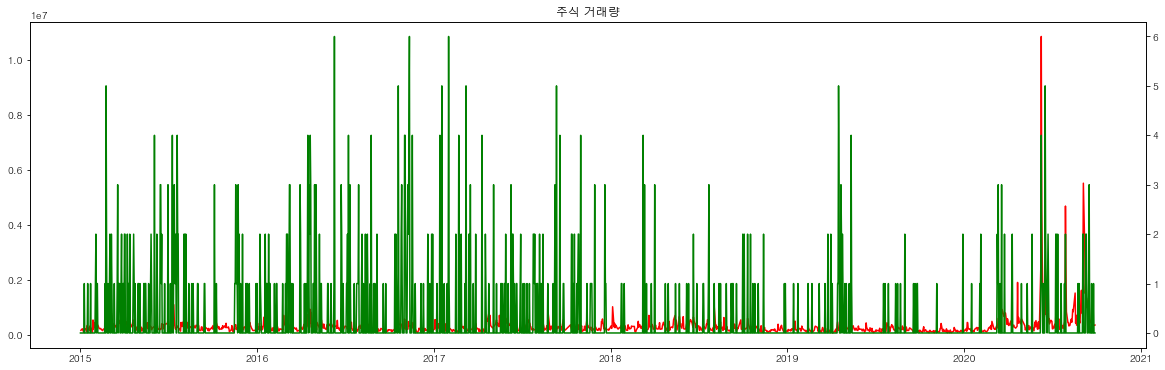

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

fig, ax0 = plt.subplots(figsize=(20,6))
ax1 = ax0.twinx()

ax0.plot_date(trade_date, stock, '-', color='r')
ax1.plot_date(news_date, topic_count, '-', color='g')
plt.title('주식 거래량') 
plt.show()

In [29]:
news_date = date_topics_grpd.loc['2020-01-01':'2020-09-28'].index
topic_count = date_topics_grpd.loc['2020-01-01':'2020-09-28']['Topic_count']
trade_date = trading_volume_df.loc['2020-01-01':'2020-09-28'].index
stock = trading_volume_df.loc['2020-01-01':'2020-09-28']['거래량']

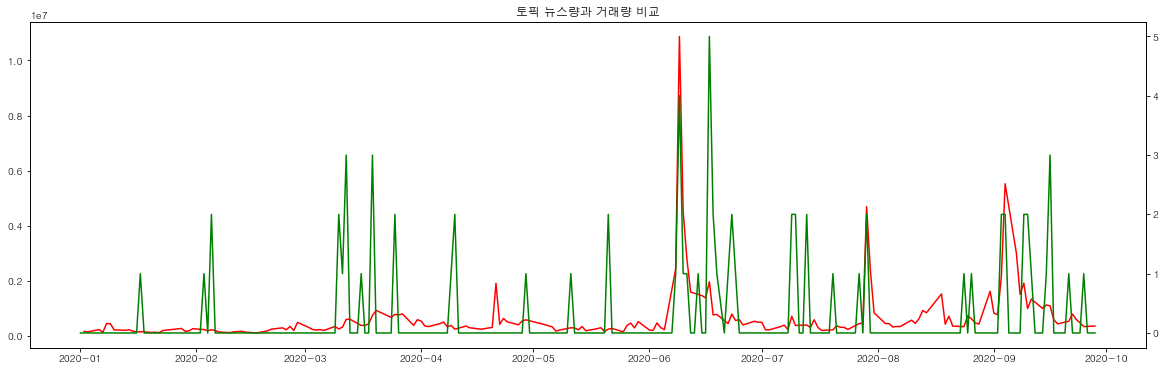

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

fig, ax0 = plt.subplots(figsize=(20,6))
ax1 = ax0.twinx()

ax0.plot_date(trade_date, stock, '-', color='r')
ax1.plot_date(news_date, topic_count, 'b-', color='g')
plt.title('토픽 뉴스량과 거래량 비교') 
plt.show()